## Goals
### Primary Goal: Identify whether there is a bottle
### Stretched Goal: Identify what type of bottle it is

In [79]:
from utils import *
from random import randint
import torch
import torch.nn as nn
import numpy as np
from torchvision import transforms
import time
import cv2
import matplotlib.pyplot as plt
import torchvision.models as models
import tensorflow as tf
import os
import pandas as pd
from fastai.vision import *
from pathlib import Path
from PIL import Image

In [80]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# device = torch.device("cpu") 
default_epoch = 15

In [81]:
def pil_loader(path):
    with open(path, 'rb') as f:
        img = Image.open(f)
        return img.convert('RGB')
    
def show(X):
    plt.imshow(np.transpose(X.numpy(), (1,2,0)))
    plt.show()

In [211]:
# Normalize and resize the images
transform = torch.nn.Sequential(
    transforms.Resize((128,160)),
    transforms.Normalize((0.3956, 0.4666, 0.4518), (0.1319, 0.1413, 0.1377))    
)  # Normalised values obtained from training dataset.

In [241]:
# Normalize and resize the images
transform = torch.nn.Sequential(
    transforms.Resize((128,64)),
    transforms.Normalize((0.3956, 0.4666, 0.4518), (0.1319, 0.1413, 0.1377))    
)  # Normalised values obtained from training dataset.

In [242]:
# Bottle
onlyfiles_bottle = [f for f in os.listdir('data/Bottle')]
print(type(onlyfiles_bottle))
print(len(onlyfiles_bottle))

samples_bottle = []
for i, filenames in enumerate(onlyfiles_bottle):
    samples_bottle.append([filenames, 1])             # Assign label of 1 when there is bottle

np.random.seed(3)
p = np.random.permutation(len(samples_bottle))
samples_bottle = np.array(samples_bottle)

print(type(samples_bottle))
print(len(samples_bottle))

test_data_bottle = samples_bottle[p[:304]][:,0]
test_labels_bottle = samples_bottle[p[:304]][:,1]
train_data_bottle = samples_bottle[p[304:]][:,0]
train_labels_bottle = samples_bottle[p[304:]][:,1]

print(len(test_data_bottle))
print(len(train_data_bottle))

print(test_data_bottle[0])

#img = pil_loader('data/Bottle/' + train_data_bottle[0])
#print(img)
#img = transforms.Resize(128)(img)
#img = transforms.ToTensor()(img)
#print(img.size())
#img = pil_loader('data/Bottle/' + train_data_bottle[1])
#print(img)
#img = transforms.Resize(128)(img)
#img = transforms.ToTensor()(img)
#print(img.size())

def getBottle(train, index):
    if train:
        img_path, label = train_data_bottle[index], train_labels_bottle[index]
    else:
        img_path, label = test_data_bottle[index], test_labels_bottle[index]

    img = pil_loader('data/Bottle/' + img_path)
    
    #img = transforms.Resize(32)(img)
    img = transforms.Resize(128)(img)
    #img = transforms.Resize(64)(img)
    img = transforms.ToTensor()(img)
    img = transform(img)

    return img, label

<class 'list'>
1014
<class 'numpy.ndarray'>
1014
304
710
image2020-02-18 00_06_11.733850.jpg


In [243]:
# No bottle
onlyfiles_nobottle = [f for f in os.listdir('data/NoBottle')]
print(len(onlyfiles_nobottle))

samples_nobottle = []
for i, filenames in enumerate(onlyfiles_nobottle):
    samples_nobottle.append([filenames, 0])             # Assign label of 1 when there is bottle

np.random.seed(3)
p = np.random.permutation(len(samples_nobottle))
samples_nobottle = np.array(samples_nobottle)

print(type(samples_nobottle))
print(len(samples_nobottle))

test_data_nobottle = samples_nobottle[p[:18]][:,0]
test_labels_nobottle = samples_nobottle[p[:18]][:,1]
train_data_nobottle = samples_nobottle[p[18:]][:,0]
train_labels_nobottle = samples_nobottle[p[18:]][:,1]

print(len(test_data_bottle))
print(len(train_data_bottle))

def getNoBottle(train, index):
    if train:
        img_path, label = train_data_nobottle[index], train_labels_nobottle[index]
    else:
        img_path, label = test_data_nobottle[index], test_labels_nobottle[index]

    img = pil_loader('data/NoBottle/' + img_path)
    #img = transforms.Resize(32)(img)
    img = transforms.Resize(128)(img)
    #img = transforms.Resize(64)(img)
    img = transforms.ToTensor()(img)
    img = transform(img)

    return img, label

61
<class 'numpy.ndarray'>
61
304
710


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bottle Train Image


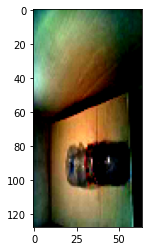

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(tensor([[[-0.1306, -0.0702, -0.0219,  ..., -0.3151, -0.3531, -0.4177],
         [-0.0712, -0.0558,  0.0078,  ..., -0.2895, -0.3234, -0.4228],
         [-0.0312, -0.0261,  0.0375,  ..., -0.2598, -0.2937, -0.3931],
         ...,
         [-0.0363, -0.0117,  0.0715,  ..., -0.6166, -0.6063, -0.6607],
         [-0.0661, -0.0414,  0.0417,  ..., -0.6166, -0.6063, -0.6607],
         [-0.0958, -0.0712,  0.0036,  ..., -0.6463, -0.6361, -0.6607]],

        [[ 0.2359,  0.2923,  0.3374,  ...,  0.1115,  0.0837,  0.0235],
         [ 0.2914,  0.3058,  0.3652,  ...,  0.1353,  0.1115,  0.0187],
         [ 0.3287,  0.3335,  0.3929,  ...,  0.1631,  0.1392,  0.0464],
         ...,
         [ 0.1575,  0.1804,  0.2225,  ..., -0.3048, -0.2636, -0.3144],
         [ 0.1297,  0.1527,  0.1709,  ..., -0.3048, -0.2636, -0.3144],
         [ 0.1019,  0.1249,  0.1115,  ..., -0.3087, -0.2914, -0.3144]],

        [[ 0.2072,  0.2650,  0.3113,  ...,  0.0265, -0.0060, -0.0678],
         [ 0.2642,  0.2788,  0.3398,  ...,  

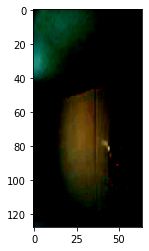

In [244]:
print("Bottle Train Image")
bottle_train_img = getBottle(train=True, index=0)
show(bottle_train_img[0])
print(bottle_train_img)
print(type(bottle_train_img))

print("No Bottle Train Image")
nobottle_train_img = getNoBottle(train=True, index=0)
show(nobottle_train_img[0])

In [245]:
#bottle_train_data = getNoBottle(train=True, index=i)
train_data = []
for i in range(710):
    train_data.append(getBottle(train=True, index=i))
for i in range(43):
    train_data.append(getNoBottle(train=True, index=i))
print(len(train_data))  

test_data = []
for i in range(304):
    test_data.append(getBottle(train=False, index=i))
for i in range(18):
    test_data.append(getNoBottle(train=False, index=i))
print(len(test_data))

print(type(getBottle(train=True, index=0)))
print(type(train_data))

753
322
<class 'tuple'>
<class 'list'>


In [246]:
print(train_data[0][0].size())
print(train_data[1][0].size())

torch.Size([3, 128, 64])
torch.Size([3, 128, 64])


In [247]:
# Load into dataloader for easier batching
bs = 64
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=bs, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=bs)

In [190]:
# Getting the mean and std across all three channels for normalisation. Run only once.
means = []
stds = []
for i in train_data:
    means.append((i[0]))
    stds.append(i[0])
test =  torch.cat(means)
test = test.view(-1,3,128,170)
print(test.mean(axis=(0,2,3)))
print(test.std(axis=(0,2,3)))

tensor([0.3956, 0.4666, 0.4518])
tensor([0.1319, 0.1413, 0.1377])


In [249]:
# MLP
class BaseMLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
        super(BaseMLP, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.layer3 = nn.Linear(hidden_size2, hidden_size3)
        self.layer4 = nn.Linear(hidden_size3, output_size)
        
    def forward(self, x):
        x = x.view(-1,24576)
        x = self.layer1(x)
        x = torch.relu(x)
        x = self.layer2(x)
        x = torch.relu(x)
        x = self.layer3(x)
        x = torch.relu(x)
        x = self.layer4(x)
        return x
    
# CNN
class BaseCNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(BaseCNN, self).__init__()
        self.output_size = output_size
        self.conv1 = nn.Conv2d(input_size, hidden_size, kernel_size = 3, stride = 2, padding = 1) #3*128*64 -> 8*64*32
        self.conv2 = nn.Conv2d(hidden_size, output_size, kernel_size = 3,stride =2, padding = 1) #8*64*32 -> 16*32*16
        self.linearlayer1 = nn.Linear(output_size*32*16, 2)                                     #16*32*16 -> 1*8192
        
    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)
        x = x.view(-1, self.output_size*32*16)
        x = self.linearlayer1(x)
        return x
        
#basemlp = BaseMLP(3*128*64, 128, 64, 32, 2)
#basecnn = BaseCNN(3, 8, 16)

In [250]:
def init_list():
    """
    init an empty list of list for data storage"""
    lst = [] 
    for i in range(8):
        lst.append([]) 
    return lst

In [251]:
# Training function
def train(epochs, dataloader, testdataloader, model, lr, loss_class, opt, out_result = init_list()):
    start = time.time()
    for i in range(epochs):
        validation_loss = 0.0
        running_loss = 0.0
        num_batches = 0
        for batch_idx, [data, label] in enumerate(dataloader):
            opt.zero_grad()
            label = [int(x) for x in label]
            label = torch.LongTensor(label)
            if str(device.type) == "cuda" :
                data, label = data.cuda(), label.cuda()
            else :
                data, label = data.cpu(), label.cpu()     
                
            scores = model(data)
            loss = loss_class(scores, label)
            loss.backward()
            opt.step()
            

            running_loss += loss.detach().item()
            num_batches += 1
            
        total_loss = running_loss/num_batches
        print(f'epoch={i + 1},\t lr={lr},\t loss={total_loss}')
        
        eval(model, testdataloader, out_result)
    print(f'Time elapsed:{time.time()-start}')
    out_result.append(time.time()-start)

In [258]:
# Testing code
def eval(model, setloader, out_result = init_list()):
    correct_count = 0
    total_count = 0
    
    prediction = torch.zeros(0).cpu()
    truth = torch.zeros(0).cpu()
    
#    if is_on_cuda :
#        prediction = torch.zeros(0).cuda()
#        truth = torch.zeros(0).cuda()
    
    for batch_idx, [data, label] in enumerate(setloader):
        label = torch.LongTensor([int(x) for x in label])
        if str(device.type) == "cuda" :
            data, label = data.cuda(), label.cuda()
            print("cuda is on")
        else :
            data, label = data.cpu(), label.cpu()
        
        probs = model(data)
        probs = nn.Softmax(dim=1)(probs)
        pred = torch.argmax(probs, dim=1)
        
        # Result collection
#         correct_count += torch.sum(label==pred).detach().item()
#         total_count += len(data)
        prediction = torch.cat((prediction, pred),dim=0)
        truth = torch.cat((truth, label),dim=0)
        #print(torch.sum(label==pred).detach().item())
        
    # Results calculation here
    prediction, truth = prediction.detach(), truth.detach()
    #display.metrics(prediction, truth)
    calculate(prediction, truth, out_result)

In [259]:
def calculate(prediction, truth, out):
	"""
	Takes in a tensor of predictions and a tensor of labels.
	Store tp, fp, tn, fn, acc, precision, recall ,f1 in this order."""
	acc = torch.sum(prediction==truth).item() / len(prediction)
	confusion_vector = prediction/truth
	tp = torch.sum(confusion_vector == 1).item()
	fp = torch.sum(confusion_vector == float('inf')).item()
	tn = torch.sum(torch.isnan(confusion_vector)).item()
	fn = torch.sum(confusion_vector == 0).item()
	precision = 0 if (tp+fp) == 0 else tp/(tp+fp)
	recall = 0 if (tp+fn) == 0 else tp/(tp+fn)
	f1 = 0 if (precision+recall) == 0 else 2*precision*recall/(precision+recall)
	out[0].append(float(tp))
	out[1].append(float(fp))
	out[2].append(float(tn))
	out[3].append(float(fn))
	out[4].append(acc)
	out[5].append(precision)
	out[6].append(recall)
	out[7].append(f1)

In [260]:
baseCNN = BaseCNN(3, 8, 16).to(device)    
# bs=32  @ adjust batchsize in dataloader 
lr = 0.001
opt = torch.optim.Adam(baseCNN.parameters(), lr=lr)
epoch = default_epoch
loss_class = nn.CrossEntropyLoss()

result_base_cnn = init_list()
train(epoch, train_dataloader, test_dataloader, baseCNN, lr, loss_class, opt, result_base_cnn)

epoch=1,	 lr=0.001,	 loss=0.2953152709330122
epoch=2,	 lr=0.001,	 loss=0.1956911776214838
epoch=3,	 lr=0.001,	 loss=0.15596800747637948
epoch=4,	 lr=0.001,	 loss=0.11188746119538943
epoch=5,	 lr=0.001,	 loss=0.08194595016539097
epoch=6,	 lr=0.001,	 loss=0.04137804945154736
epoch=7,	 lr=0.001,	 loss=0.02829113028322657
epoch=8,	 lr=0.001,	 loss=0.016587927006185055
epoch=9,	 lr=0.001,	 loss=0.011282738550410917
epoch=10,	 lr=0.001,	 loss=0.011495022956902782
epoch=11,	 lr=0.001,	 loss=0.00894011597847566
epoch=12,	 lr=0.001,	 loss=0.006039235697244294
epoch=13,	 lr=0.001,	 loss=0.007460334134520963
epoch=14,	 lr=0.001,	 loss=0.005715990977478214
epoch=15,	 lr=0.001,	 loss=0.003430854393324504
Time elapsed:7.753291845321655


In [265]:
eval(baseCNN, test_dataloader)

[[304.0, 304.0, 304.0, 303.0, 304.0, 302.0, 299.0, 301.0, 302.0, 299.0, 301.0, 300.0, 299.0, 302.0, 301.0], [18.0, 18.0, 16.0, 14.0, 12.0, 6.0, 1.0, 1.0, 5.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0], [0.0, 0.0, 2.0, 4.0, 6.0, 12.0, 17.0, 17.0, 13.0, 17.0, 17.0, 17.0, 17.0, 16.0, 17.0], [0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 5.0, 3.0, 2.0, 5.0, 3.0, 4.0, 5.0, 2.0, 3.0], [0.9440993788819876, 0.9440993788819876, 0.9503105590062112, 0.953416149068323, 0.9627329192546584, 0.9751552795031055, 0.9813664596273292, 0.9875776397515528, 0.9782608695652174, 0.9813664596273292, 0.9875776397515528, 0.984472049689441, 0.9813664596273292, 0.9875776397515528, 0.9875776397515528], [0.9440993788819876, 0.9440993788819876, 0.95, 0.9558359621451105, 0.9620253164556962, 0.9805194805194806, 0.9966666666666667, 0.9966887417218543, 0.9837133550488599, 0.9966666666666667, 0.9966887417218543, 0.9966777408637874, 0.9966666666666667, 0.993421052631579, 0.9966887417218543], [1.0, 1.0, 1.0, 0.9967105263157895, 1.0, 0.993421052631579,

In [263]:
baseMLP = BaseMLP(3*128*64, 128, 64, 32, 2).to(device)
# bs=32  @ adjust batchsize in dataloader 
lr = 0.001
opt = torch.optim.Adam(baseMLP.parameters(), lr=lr)
epoch = default_epoch
loss_class = nn.CrossEntropyLoss()

result_base_mlp = init_list()
train(epoch, train_dataloader, test_dataloader, baseMLP, lr, loss_class, opt, result_base_mlp)

epoch=1,	 lr=0.001,	 loss=0.2444029413163662
epoch=2,	 lr=0.001,	 loss=0.07471078137556712
epoch=3,	 lr=0.001,	 loss=0.03549433716883262
epoch=4,	 lr=0.001,	 loss=0.021788535872474313
epoch=5,	 lr=0.001,	 loss=0.017121899873018265
epoch=6,	 lr=0.001,	 loss=0.014020125279785134
epoch=7,	 lr=0.001,	 loss=0.016875517981437344
epoch=8,	 lr=0.001,	 loss=0.020908113508388244
epoch=9,	 lr=0.001,	 loss=0.003046897147820952
epoch=10,	 lr=0.001,	 loss=0.0026773212763752476
epoch=11,	 lr=0.001,	 loss=0.0033134724484019293
epoch=12,	 lr=0.001,	 loss=0.008823794733568016
epoch=13,	 lr=0.001,	 loss=0.04690275033802512
epoch=14,	 lr=0.001,	 loss=0.008529382745715944
epoch=15,	 lr=0.001,	 loss=0.0025045054717338644
Time elapsed:2.0454280376434326


In [266]:
eval(baseMLP, test_dataloader)

In [261]:
# Alexnet
import gc
gc.collect()
alexnet = models.alexnet().to(device)  #lowest val loss 0.55
lr = 0.0001 
opt = torch.optim.Adam(alexnet.parameters(), lr=lr)
epoch = 15
loss_class = nn.CrossEntropyLoss()

result_alexnet = init_list()
train(epoch, train_dataloader,test_dataloader, alexnet, lr, loss_class, opt, result_alexnet)

epoch=1,	 lr=0.0001,	 loss=2.804094694089102
epoch=2,	 lr=0.0001,	 loss=0.39843233674764633
epoch=3,	 lr=0.0001,	 loss=0.3025803280373414
epoch=4,	 lr=0.0001,	 loss=0.23486307884256044
epoch=5,	 lr=0.0001,	 loss=0.2173557554682096
epoch=6,	 lr=0.0001,	 loss=0.19861302462716898
epoch=7,	 lr=0.0001,	 loss=0.1772811207920313
epoch=8,	 lr=0.0001,	 loss=0.15880474944909415
epoch=9,	 lr=0.0001,	 loss=0.14106165741880736
epoch=10,	 lr=0.0001,	 loss=0.11954347851375739
epoch=11,	 lr=0.0001,	 loss=0.09649473940953612
epoch=12,	 lr=0.0001,	 loss=0.07133479447414477
epoch=13,	 lr=0.0001,	 loss=0.05020847792426745
epoch=14,	 lr=0.0001,	 loss=0.029850866410318606
epoch=15,	 lr=0.0001,	 loss=0.04317732708022959
Time elapsed:86.20479702949524


In [267]:
eval(alexnet, test_dataloader)

In [270]:
# vgg16
vgg16 = models.vgg16().to(device)
lr = 0.0001
opt = torch.optim.Adam(vgg16.parameters(), lr=lr)
epoch = default_epoch
loss_class = nn.CrossEntropyLoss()


result_vgg16 = init_list()
train(epoch, train_dataloader, test_dataloader, vgg16, lr, loss_class, opt, result_vgg16)

epoch=1,	 lr=0.0001,	 loss=1.594642483939727
epoch=2,	 lr=0.0001,	 loss=0.2579045159121354
epoch=3,	 lr=0.0001,	 loss=0.21411463990807533
epoch=4,	 lr=0.0001,	 loss=0.18047499222060046
epoch=5,	 lr=0.0001,	 loss=0.1670706539104382
epoch=6,	 lr=0.0001,	 loss=0.10550613918652137
epoch=7,	 lr=0.0001,	 loss=0.03387178614502773
epoch=8,	 lr=0.0001,	 loss=0.0661972996701176
epoch=9,	 lr=0.0001,	 loss=0.03711776650743559
epoch=10,	 lr=0.0001,	 loss=0.0200011997949332
epoch=11,	 lr=0.0001,	 loss=0.02041217640119915
epoch=12,	 lr=0.0001,	 loss=0.022589844830993872
epoch=13,	 lr=0.0001,	 loss=0.03591121690503011
epoch=14,	 lr=0.0001,	 loss=0.02094021742232144
epoch=15,	 lr=0.0001,	 loss=0.015545812785414151
Time elapsed:1009.1383969783783


In [271]:
eval(vgg16, test_dataloader)

In [273]:
# Squeezenet1_1
import gc
gc.collect()

squeezenet1_1 = models.squeezenet1_1().to(device)
lr = 0.0003
opt = torch.optim.Adam(squeezenet1_1.parameters(), lr=lr)
epoch = default_epoch
loss_class = nn.CrossEntropyLoss()

result_squeezenet1_1 = init_list()
train(epoch, train_dataloader,test_dataloader, squeezenet1_1, lr, loss_class, opt, result_squeezenet1_1)

epoch=1,	 lr=0.0003,	 loss=2.3456435898939767
epoch=2,	 lr=0.0003,	 loss=0.5360366362147033
epoch=3,	 lr=0.0003,	 loss=0.29008710632721585
epoch=4,	 lr=0.0003,	 loss=0.24941800783077875
epoch=5,	 lr=0.0003,	 loss=0.2282530851662159
epoch=6,	 lr=0.0003,	 loss=0.22068486859401068
epoch=7,	 lr=0.0003,	 loss=0.21520599784950414
epoch=8,	 lr=0.0003,	 loss=0.19184308250745138
epoch=9,	 lr=0.0003,	 loss=0.1728848461061716
epoch=10,	 lr=0.0003,	 loss=0.16348679984609285
epoch=11,	 lr=0.0003,	 loss=0.1428088415414095
epoch=12,	 lr=0.0003,	 loss=0.11100478594501813
epoch=13,	 lr=0.0003,	 loss=0.08871902409009635
epoch=14,	 lr=0.0003,	 loss=0.058732746013750635
epoch=15,	 lr=0.0003,	 loss=0.06641401334976156
Time elapsed:76.63484215736389


In [274]:
eval(squeezenet1_1, test_dataloader)

In [275]:
def comparison_graph(title, y_label, x_label, results, result_index, labels, markers): 
	# plot
	fig, ax = plt.subplots()
	fig.set_size_inches(10, 5)
	max_x = 0
	for i in range(len(labels)): 
		# make epoc list
		x = array = np.arange(1, len(results[i][result_index])+1)
		max_x = max(max_x, len(results[i][result_index]))
		ax.plot(x, results[i][result_index], linewidth=1.0, label=labels[i], marker = markers[i])
	ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
	ax.set(xlabel= x_label, ylabel= y_label, title=title, xlim=(0, max_x + 0.5), xticks=np.arange(1, max_x + 1))
	plt.show()

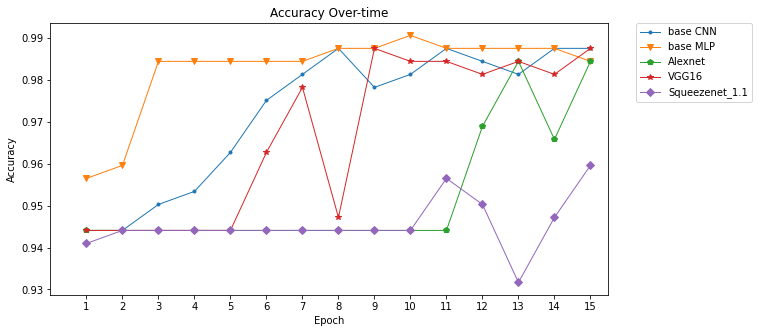

In [278]:
results = [result_base_cnn, result_base_mlp, result_alexnet, result_vgg16, result_squeezenet1_1]
labels = ["base CNN", "base MLP", "Alexnet", "VGG16", "Squeezenet_1.1"]
markers = [".","v","p","*","D"] 

comparison_graph("Accuracy Over-time", "Accuracy", "Epoch", results, 4, labels, markers)